In [16]:
%run ./Code.ipynb

In [2]:
VERSION = 20
CLOUD_SINGLE = True
DATA_SMALL = False

In [3]:
if 'train_md' not in globals() or 'test_md' not in globals():
    train_md, test_md = loadMetadata()

# OOF

In [17]:
stg = time.time()
for ds in range(6,10):
    for fold in range(3):
        predictions = oof_one(num_iter=8, bs=32, fold=fold, dataset=ds)
        pickle.dump(predictions, open(PATH_WORK/'oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'wb'))
        print('total time', time.time() - stg)

completed epochs: 10 iters starting now: 8
adding dummy serieses 8
DataSet 6 valid size 6496 fold 0
dataset valid: 6496 loader valid: 203
loading model model.b10.f0.d6.v20
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.162 time per batch: 0.183
Batch 100 device: cuda time passed: 16.978 time per batch: 0.170
Batch 150 device: cuda time passed: 24.873 time per batch: 0.166
Batch 200 device: cuda time passed: 32.300 time per batch: 0.161
ver 20, iter 0, fold 0, val ll: 0.0652, cor: 0.8369, auc: 0.9875
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.334 time per batch: 0.187
Batch 100 device: cuda time passed: 17.476 time per batch: 0.175
Batch 150 device: cuda time passed: 26.070 time per batch: 0.174
Batch 200 device: cuda time passed: 33.429 time per batch: 0.167
ver 20, iter 1, fold 0, val ll: 0.0653, cor: 0.8367, auc: 0.9874
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.420 time per batch: 0.188
Batch 100 device: cuda time passed: 17.54

Batch 200 device: cuda time passed: 32.468 time per batch: 0.162
ver 20, iter 5, fold 2, val ll: 0.0617, cor: 0.8392, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.191 time per batch: 0.184
Batch 100 device: cuda time passed: 17.036 time per batch: 0.170
Batch 150 device: cuda time passed: 24.868 time per batch: 0.166
Batch 200 device: cuda time passed: 32.011 time per batch: 0.160
ver 20, iter 6, fold 2, val ll: 0.0616, cor: 0.8393, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 8.998 time per batch: 0.180
Batch 100 device: cuda time passed: 17.103 time per batch: 0.171
Batch 150 device: cuda time passed: 24.890 time per batch: 0.166
Batch 200 device: cuda time passed: 32.050 time per batch: 0.160
ver 20, iter 7, fold 2, val ll: 0.0617, cor: 0.8391, auc: 0.9889
total running time 309.2684922218323
total time 940.213463306427
completed epochs: 10 iters starting now: 8
adding dummy serieses 8
DataSet 7 valid size 6496 fold 0
dataset

Batch 50 device: cuda time passed: 10.715 time per batch: 0.214
Batch 100 device: cuda time passed: 20.365 time per batch: 0.204
Batch 150 device: cuda time passed: 28.452 time per batch: 0.190
Batch 200 device: cuda time passed: 36.948 time per batch: 0.185
ver 20, iter 3, fold 2, val ll: 0.0603, cor: 0.8429, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.531 time per batch: 0.211
Batch 100 device: cuda time passed: 19.684 time per batch: 0.197
Batch 150 device: cuda time passed: 28.593 time per batch: 0.191
Batch 200 device: cuda time passed: 37.111 time per batch: 0.186
ver 20, iter 4, fold 2, val ll: 0.0605, cor: 0.8430, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 10.294 time per batch: 0.206
Batch 100 device: cuda time passed: 19.240 time per batch: 0.192
Batch 150 device: cuda time passed: 27.197 time per batch: 0.181
Batch 200 device: cuda time passed: 34.763 time per batch: 0.174
ver 20, iter 5, fold 2, val ll: 0.0603, c

Batch 200 device: cuda time passed: 32.605 time per batch: 0.163
ver 20, iter 0, fold 2, val ll: 0.0626, cor: 0.8366, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.184 time per batch: 0.184
Batch 100 device: cuda time passed: 16.992 time per batch: 0.170
Batch 150 device: cuda time passed: 24.975 time per batch: 0.167
Batch 200 device: cuda time passed: 32.662 time per batch: 0.163
ver 20, iter 1, fold 2, val ll: 0.0626, cor: 0.8366, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.546 time per batch: 0.191
Batch 100 device: cuda time passed: 17.585 time per batch: 0.176
Batch 150 device: cuda time passed: 25.753 time per batch: 0.172
Batch 200 device: cuda time passed: 33.146 time per batch: 0.166
ver 20, iter 2, fold 2, val ll: 0.0626, cor: 0.8369, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.126 time per batch: 0.183
Batch 100 device: cuda time passed: 17.177 time per batch: 0.172
Batch 150 device: 

ver 20, iter 6, fold 1, val ll: 0.0626, cor: 0.8404, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.644 time per batch: 0.193
Batch 100 device: cuda time passed: 17.776 time per batch: 0.178
Batch 150 device: cuda time passed: 26.066 time per batch: 0.174
Batch 200 device: cuda time passed: 33.986 time per batch: 0.170
ver 20, iter 7, fold 1, val ll: 0.0624, cor: 0.8406, auc: 0.9881
total running time 310.90257143974304
total time 3556.5488913059235
completed epochs: 10 iters starting now: 8
adding dummy serieses 2
DataSet 9 valid size 6496 fold 2
dataset valid: 6496 loader valid: 203
loading model model.b10.f2.d9.v20
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.322 time per batch: 0.186
Batch 100 device: cuda time passed: 17.375 time per batch: 0.174
Batch 150 device: cuda time passed: 25.351 time per batch: 0.169
Batch 200 device: cuda time passed: 32.601 time per batch: 0.163
ver 20, iter 0, fold 2, val ll: 0.0606, cor: 0.8411, auc: 0.98

In [12]:
476*8*4/60/60

4.231111111111111

In [ ]:
# correlation between models
# scores per slice
# what is the best way to agg oof, model\run levels
# best aggregation theoretically
# distribution of oof preds
# score - what uniform p will get
# 0.5 + np.sign(x-0.5) *2*(x-0.5)**2 - makes it less aggressive, is it a good transform above mean?
# does scaling help for single runs, or is it aggregation artifact.

# s101 problem.
    # maybe 8 and 32 behave differently

## Selecting runs aggregation

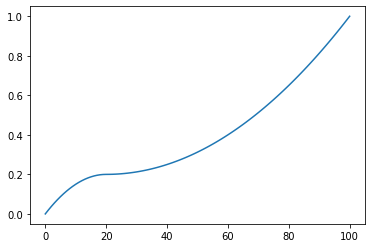

In [38]:
x = np.arange(101)/100
plt.plot(scalePreds(x, center=0.2))

In [11]:
np.set_printoptions(precision=5)

for fold in range(3):
    print('fold', fold)
    data_fold = train_md.loc[train_md.fold == fold]
    ww = data_fold.weights.values
    ww = ww/ww.mean()

    preds = np.stack([pickle.load(open(PATH_WORK/'oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'rb')) \
        for ds in range(6,10)])

    assert len(data_fold) == preds.shape[2]
    
    preds = np.clip(preds, 1e-15, 1-1e-15)
    for afunc in afuncs_names:
        apreds = applyAggFunc(preds, afunc)
        res = ((- data_fold[all_ich].values * np.log(apreds) - (1 - data_fold[all_ich].values) * np.log(1 - apreds))\
            * class_weights).mean((1,2))
        resw = (((- data_fold[all_ich].values * np.log(apreds) - (1 - data_fold[all_ich].values) * np.log(1 - apreds))\
            * class_weights).mean(2)*ww).mean(1)
        
        #roc = [roc_auc_score(data_fold[all_ich].values.reshape(-1), apreds[i].reshape(-1)) for i in range(4)]
        print('{:7s} {} {}'.format(afunc,res,resw))

fold 0
mean    [0.06429 0.06347 0.06388 0.06304] [0.03816 0.03822 0.0384  0.03748]
gmean   [0.06444 0.06361 0.06411 0.06326] [0.03824 0.03834 0.03854 0.03766]
q50     [0.06454 0.06372 0.06428 0.06335] [0.03833 0.03843 0.03866 0.03772]
q25     [0.06518 0.06432 0.06533 0.06426] [0.03866 0.0388  0.03924 0.0383 ]
q75     [0.0646  0.06367 0.06456 0.06314] [0.03832 0.03838 0.03889 0.03755]
psig    [0.06443 0.06362 0.06407 0.06324] [0.03823 0.03836 0.03853 0.03765]
fold 1
mean    [0.06225 0.06248 0.06258 0.06124] [0.03745 0.0385  0.03817 0.03723]
gmean   [0.06232 0.06259 0.06286 0.06144] [0.03755 0.03864 0.0384  0.03744]
q50     [0.06246 0.06274 0.06298 0.06153] [0.03764 0.03872 0.03849 0.03745]
q25     [0.06279 0.06314 0.06421 0.06238] [0.03804 0.03919 0.03941 0.03828]
q75     [0.0627  0.06297 0.06296 0.06155] [0.03752 0.03861 0.03817 0.03711]
psig    [0.06237 0.06263 0.06278 0.06143] [0.03756 0.03865 0.03834 0.03742]
fold 2
mean    [0.06078 0.05956 0.06078 0.05974] [0.03823 0.03747 0.0383  

In [17]:
preds_all = getPredsOOF(aug=8,datasets=range(6,10))

In [18]:
((- train_md[all_ich].values * np.log(preds_all) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.06332, 0.06269, 0.06419, 0.06245])

In [19]:
((- train_md[all_ich].values * np.log(preds_all.mean(1)) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all.mean(1),1e-15,1-1e-15)))
 * class_weights).mean((1,2))

array([0.06244, 0.06184, 0.06241, 0.06134])

In [20]:
runs_afunc = 'mean'
preds2 = applyAggFunc(preds_all, runs_afunc)

## Selecting models aggregation

In [21]:
for afunc in afuncs_names:
    #print(afunc)
    apreds = applyAggFunc(preds2, afunc, axis=0)
    res = ((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()
    
    if False:
        best_score = res
        best_k = 0
        for k in range(1,50):
            apreds2 = scalePreds(apreds, 1.0 + 0.01 * k)
            apreds2 = np.clip(apreds2, 1e-15, 1-1e-15)

            res2 = ((- train_md[all_ich].values * np.log(apreds2) - (1 - train_md[all_ich].values) * np.log(1 - apreds2))\
                    * class_weights).mean()

            if res2 > best_score: break
            best_score = res2
            best_k = k

        print('{:7s} {:5f}   {:2f} {:5f}'.format(afunc,res,1+0.01*best_k,best_score))
    else:
        print('{:7s} {:5f}'.format(afunc,res))

mean    0.059314
gmean   0.059584
q50     0.059622
q25     0.060828
q75     0.060114
psig    0.059538


In [44]:
apreds = (preds2*np.array([0.25,0.25,0.25,0.25])[:,None,None]).sum(0)
((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()

0.059038001710494545

In [45]:
apreds = (preds2*np.array([0.2,0.2,0.2,0.4])[:,None,None]).sum(0)
((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()

0.058951267412781026

In [46]:
models_afunc = 'mean'

## Scaling

In [47]:
preds_all.shape

(4, 32, 674252, 6)

In [48]:
res = ((- train_md[all_ich].values * np.log(preds_all) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean()

In [49]:
((- train_md[all_ich].values * np.log(preds_all) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.06268, 0.06259, 0.06242, 0.06195])

In [60]:
if False:
    best_score = res
    best_k = 0
    for k in range(1,50):
        apreds = scalePreds(preds_all, 1.0 + 0.01 * k)
        apreds = np.clip(apreds, 1e-15, 1-1e-15)

        res2 = ((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
                * class_weights).mean()

        if res2 > best_score: break
        best_score = res2
        best_k = k

    print('{{:5f}   {:2f} {:5f}'.format(res,1+0.01*best_k,best_score))

## Models behavior per groups

In [22]:
for col in cols_le:
    for i in train_md[col].unique():
        res = ((- train_md[all_ich].values * np.log(preds_all.mean(1)) - (1 - train_md[all_ich].values) \
                * np.log(1 - preds_all.mean(1))) * class_weights)[:,(train_md[col] == i)].mean((1,2))
        sz = (train_md[col] == i).sum()
        sz_test = (test_md[col] == i).sum()
        print('{:20s} {:2d} {:6d} {:6d} {}'.format(col,i,sz,sz_test,res))

WindowCenter_1_le     0 248151   2157 [0.03754 0.03719 0.03679 0.03699]
WindowCenter_1_le     2  10377     34 [0.11828 0.11642 0.11726 0.11536]
WindowCenter_1_le     3 341674  75369 [0.06474 0.06439 0.06526 0.06359]
WindowCenter_1_le     1  70894    985 [0.12907 0.12632 0.12904 0.12675]
WindowCenter_1_le     4   3156      0 [0.09075 0.09554 0.09205 0.08595]
BitType_le            1 323550   3088 [0.05799 0.0573  0.05758 0.05716]
BitType_le            0 338723  75369 [0.06411 0.06378 0.0646  0.06293]
BitType_le            2   2252     60 [0.12818 0.12513 0.12613 0.12392]
BitType_le            4   6776     28 [0.13693 0.12889 0.12844 0.12693]
BitType_le            3   2951      0 [0.13769 0.13434 0.14018 0.13928]
WindowCenter_0_le     1 248151   2157 [0.03754 0.03719 0.03679 0.03699]
WindowCenter_0_le     4  10343     34 [0.11838 0.11662 0.1173  0.11543]
WindowCenter_0_le     2 151196   2148 [0.1232  0.12122 0.12367 0.12085]
WindowCenter_0_le     0 213404  69272 [0.0356  0.03576 0.03592 0

In [25]:
preds_all.shape

(4, 8, 674252, 6)

In [27]:
col = 'PxlMin_grp_le'
for k in range(6):
    for i in train_md[col].unique():
        res = (- train_md[all_ich[k]].values * np.log(preds_all.mean(1)[:,:,k]) - (1 - train_md[all_ich[k]].values) \
                * np.log(1 - preds_all.mean(1)[:,:,k]))[:,(train_md[col] == i)].mean(1)
        sz = (train_md[col] == i).sum()
        sz_test = (test_md[col] == i).sum()
        print('{:20s} {:2d} {:20s} {:6d} {:6d} {}'.format(col,i,all_ich[k],sz,sz_test,res))

PxlMin_grp_le         2 any                  363504   3934 [0.10395 0.10279 0.10281 0.10252]
PxlMin_grp_le         1 any                   83433   1095 [0.18196 0.17981 0.1821  0.17766]
PxlMin_grp_le         0 any                  227315  73516 [0.06435 0.06464 0.06487 0.06336]
PxlMin_grp_le         2 epidural             363504   3934 [0.01702 0.01776 0.01722 0.01757]
PxlMin_grp_le         1 epidural              83433   1095 [0.02218 0.02326 0.02527 0.0242 ]
PxlMin_grp_le         0 epidural             227315  73516 [0.01231 0.01366 0.01299 0.01279]
PxlMin_grp_le         2 intraparenchymal     363504   3934 [0.04702 0.04555 0.04753 0.04491]
PxlMin_grp_le         1 intraparenchymal      83433   1095 [0.0879  0.08405 0.08973 0.0842 ]
PxlMin_grp_le         0 intraparenchymal     227315  73516 [0.02321 0.02288 0.02356 0.02277]
PxlMin_grp_le         2 intraventricular     363504   3934 [0.02567 0.02499 0.02586 0.02512]
PxlMin_grp_le         1 intraventricular      83433   1095 [0.06925 0.

In [38]:
pd.crosstab([train_md['PxlMin_grp_le']], [train_md[all_ich[0]]])

any,0,1
PxlMin_grp_le,,
0,212492,14823
1,56254,27179
2,308403,55101


## Standard deviation analysis

In [39]:
stds = preds_all.std(1)

In [40]:
stds.mean((1))

array([[0.00663, 0.00082, 0.00371, 0.00237, 0.00463, 0.00465],
       [0.00653, 0.00076, 0.00331, 0.00226, 0.00419, 0.00432],
       [0.01035, 0.00107, 0.00553, 0.00373, 0.00675, 0.00676],
       [0.00783, 0.00065, 0.00383, 0.00267, 0.00484, 0.00487]])

In [41]:
stds.shape

(4, 674252, 6)

In [42]:
for i in range(6):
    idx = stds[0,:,i].argmax()
    print(preds_all[0,:,idx,i])

[0.0721  0.69844 0.04717 0.87074 0.90913 0.38538 0.47888 0.49287]
[0.65942 0.14143 0.80356 0.20604 0.03734 0.7852  0.74105 0.29836]
[0.93923 0.87878 0.88173 0.10275 0.9006  0.17714 0.87711 0.22097]
[0.92357 0.05838 0.82988 0.1811  0.91063 0.91305 0.1835  0.28412]
[0.23838 0.77077 0.26534 0.11955 0.63966 0.28781 0.76715 0.17522]
[0.75192 0.22898 0.87654 0.65612 0.38861 0.84263 0.21847 0.60288]


In [43]:
for i in range(6):
    idx = stds[3,:,i].argmax()
    print(preds_all[3,:,idx,i])

[0.89607 0.12613 0.89643 0.10395 0.8919  0.10412 0.12296 0.10019]
[0.29146 0.09448 0.08381 0.29124 0.25786 0.27932 0.26    0.17203]
[0.9805  0.96471 0.96605 0.97915 0.96169 0.12889 0.20027 0.15312]
[0.88048 0.84696 0.0523  0.05313 0.06338 0.23104 0.20848 0.92539]
[0.79051 0.40486 0.24571 0.92017 0.90041 0.22817 0.2481  0.90389]
[0.14481 0.74231 0.74153 0.14874 0.15549 0.66152 0.74362 0.17278]


In [57]:
((- preds_all.mean(1, keepdims=True) * np.log(preds_all) 
  - (1 - preds_all.mean(1, keepdims=True)) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2))

array([[0.14491, 0.00945, 0.03508, 0.02361, 0.05398, 0.06132],
       [0.14669, 0.01034, 0.03552, 0.02403, 0.05463, 0.06025],
       [0.14752, 0.00944, 0.03492, 0.02384, 0.05311, 0.06174],
       [0.14552, 0.01318, 0.03636, 0.02443, 0.05468, 0.06079]])

In [58]:
((- preds_all.mean(1, keepdims=True) * np.log(preds_all) 
  - (1 - preds_all.mean(1, keepdims=True)) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.05472, 0.05524, 0.05509, 0.05582])

In [59]:
((- preds_all.mean((1,2), keepdims=True) * np.log(preds_all) 
  - (1 - preds_all.mean((1,2), keepdims=True)) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.6043 , 0.60165, 0.59441, 0.6038 ])

# Inference

In [45]:
stg = time.time()

for ds in range(7,10):
    preds = []
    for fold in range(3):
        preds2 = []
        for anum in range(8):
            predictions = inference_one(fold = fold, anum = anum, bs=bs, dataset=ds)
            preds2.append(predictions)
        preds.append(np.stack(preds2))
    preds = np.stack(preds)
    print('total time', time.time() - stg)
    
    pickle.dump(preds, open(PATH_WORK/'preds_d{}_v{}'.format(ds, VERSION),'wb'))

completed epochs: 10
loading model model.b10.f0.d7.v20
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.526 time per batch: 0.153
B20 -> time passed: 2.362 time per batch: 0.118
B30 -> time passed: 3.266 time per batch: 0.109
B40 -> time passed: 4.109 time per batch: 0.103
B50 -> time passed: 5.558 time per batch: 0.111
B60 -> time passed: 6.227 time per batch: 0.104
B70 -> time passed: 6.670 time per batch: 0.095
test processing time: 11.566713809967041
completed epochs: 10
loading model model.b10.f0.d7.v20
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.587 time per batch: 0.159
B20 -> time passed: 2.497 time per batch: 0.125
B30 -> time passed: 3.266 time per batch: 0.109
B40 -> time passed: 4.156 time per batch: 0.104
B50 -> time passed: 5.589 time per batch: 0.112
B60 -> time passed: 6.353 time per ba

adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.560 time per batch: 0.156
B20 -> time passed: 2.432 time per batch: 0.122
B30 -> time passed: 3.284 time per batch: 0.109
B40 -> time passed: 4.143 time per batch: 0.104
B50 -> time passed: 5.454 time per batch: 0.109
B60 -> time passed: 6.186 time per batch: 0.103
B70 -> time passed: 6.679 time per batch: 0.095
test processing time: 11.56418514251709
completed epochs: 10
loading model model.b10.f2.d7.v20
adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.561 time per batch: 0.156
B20 -> time passed: 2.391 time per batch: 0.120
B30 -> time passed: 3.176 time per batch: 0.106
B40 -> time passed: 4.024 time per batch: 0.101
B50 -> time passed: 5.401 time per batch: 0.108
B60 -> time passed: 6.270 time per batch: 0.105
B70 -> time passed: 6.820 time per batch: 0.0

adding dummy serieses 26
DataSet 8 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.465 time per batch: 0.147
B20 -> time passed: 2.257 time per batch: 0.113
B30 -> time passed: 3.019 time per batch: 0.101
B40 -> time passed: 3.825 time per batch: 0.096
B50 -> time passed: 5.077 time per batch: 0.102
B60 -> time passed: 5.959 time per batch: 0.099
B70 -> time passed: 6.465 time per batch: 0.092
test processing time: 8.736656188964844
completed epochs: 10
loading model model.b10.f0.d8.v20
adding dummy serieses 26
DataSet 8 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.728 time per batch: 0.173
B20 -> time passed: 2.595 time per batch: 0.130
B30 -> time passed: 3.453 time per batch: 0.115
B40 -> time passed: 4.217 time per batch: 0.105
B50 -> time passed: 5.516 time per batch: 0.110
B60 -> time passed: 6.332 time per batch: 0.106
B70 -> time passed: 6.830 time per batch: 0.0

adding dummy serieses 26
DataSet 8 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.552 time per batch: 0.155
B20 -> time passed: 2.321 time per batch: 0.116
B30 -> time passed: 3.074 time per batch: 0.102
B40 -> time passed: 3.914 time per batch: 0.098
B50 -> time passed: 5.272 time per batch: 0.105
B60 -> time passed: 6.018 time per batch: 0.100
B70 -> time passed: 6.479 time per batch: 0.093
test processing time: 8.563255548477173
completed epochs: 10
loading model model.b10.f2.d8.v20
adding dummy serieses 26
DataSet 8 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.518 time per batch: 0.152
B20 -> time passed: 2.314 time per batch: 0.116
B30 -> time passed: 3.117 time per batch: 0.104
B40 -> time passed: 3.890 time per batch: 0.097
B50 -> time passed: 5.230 time per batch: 0.105
B60 -> time passed: 5.949 time per batch: 0.099
B70 -> time passed: 6.458 time per batch: 0.0

adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.507 time per batch: 0.151
B20 -> time passed: 2.299 time per batch: 0.115
B30 -> time passed: 3.099 time per batch: 0.103
B40 -> time passed: 3.933 time per batch: 0.098
B50 -> time passed: 5.326 time per batch: 0.107
B60 -> time passed: 6.070 time per batch: 0.101
B70 -> time passed: 6.522 time per batch: 0.093
test processing time: 8.935372591018677
completed epochs: 10
loading model model.b10.f1.d9.v20
adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.446 time per batch: 0.145
B20 -> time passed: 2.240 time per batch: 0.112
B30 -> time passed: 2.999 time per batch: 0.100
B40 -> time passed: 3.800 time per batch: 0.095
B50 -> time passed: 5.111 time per batch: 0.102
B60 -> time passed: 5.963 time per batch: 0.099
B70 -> time passed: 6.490 time per batch: 0.0

In [16]:
243*4*4/60

64.8

In [46]:
preds.shape

(3, 8, 78545, 6)

In [47]:
preds.mean((0,1,2))

array([0.13104, 0.00452, 0.04275, 0.03004, 0.0462 , 0.05505],
      dtype=float32)

# Files transfer

In [68]:
!gsutil cp /home/zahar_chikishev/running/oof* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/oof_d6_f0_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f0_v20 [Content-Type=application/octet-stream]...
- [4 files][164.5 MiB/164.5 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying file:///home/zahar_chikishev/running/oof_d7_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d8_f0_

In [69]:
!gsutil cp /home/zahar_chikishev/running/preds* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/preds_d6_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d7_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d8_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d9_v20 [Content-Type=application/octet-stream]...
\ [4 files][172.6 MiB/172.6 MiB]                                                
Operation completed over 4 objects/172.6 MiB.                                    


In [ ]:
!gsutil gs://rsna-hemorrhage/results/* .

In [19]:
!rm /home/zahar_chikishev/running/*v53

In [18]:
!ls /home/zahar_chikishev/running/*v53

/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v53
/home/zahar_chikishev/running/stats.f0.v53
/home/zahar_chikishev/running/stats.f1.v53
/home/zahar_chikishev/running/stats.f2.v53


In [20]:
!ls /home/zahar_chikishev/running/oof*

/home/zahar_chikishev/running/oof_Densenet161_f0_v72
/home/zahar_chikishev/running/oof_Densenet161_f1_v72
/home/zahar_chikishev/running/oof_Densenet161_f2_v72
/home/zahar_chikishev/running/oof_Densenet169_f0_v73
/home/zahar_chikishev/running/oof_Densenet169_f1_v73
/home/zahar_chikishev/running/oof_Densenet169_f2_v73
/home/zahar_chikishev/running/oof_Densenet201_f0_v74
/home/zahar_chikishev/running/oof_Densenet201_f1_v74
/home/zahar_chikishev/running/oof_Densenet201_f2_v74
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f0_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f1_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f2_v75


In [21]:
!ls /home/zahar_chikishev/running/preds*

/home/zahar_chikishev/running/preds_Densenet161_v72
/home/zahar_chikishev/running/preds_Densenet169_v73
/home/zahar_chikishev/running/preds_Densenet201_v74
/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v75


# Ensembling

In [49]:
preds_all = getPredsOOF(aug=8,datasets=range(6,10))

In [50]:
preds_all.shape

(4, 8, 674252, 6)

In [51]:
stg = time.time()
for fold in range(3):
    for ds_idx in range(4):
        for target in range(6):
            train_ensemble(train_md, preds_all, fold=fold, target=target, ds_idx=ds_idx, first_step=True)
print('total running time', time.time() - stg)

starting model 0 fold 0 target 0
obj  0.09979766095518008
obj  0.09961585668029331
obj  0.09940183354500212
obj  0.0997755135834763
obj  0.09933168323073682
obj  0.09945748935375663
obj  0.09940373951698349
obj  0.09942177295444647
obj  0.09921536057053071
obj  0.099121073907933
obj  0.099088423855841
obj  0.09907867324851787
obj  0.09907624409101681
obj  0.09907505118803715
obj  0.09907475827537518
obj  0.09907470333472539
obj  0.09907470330769187
obj  0.09907470330732189
obj  0.09907468857023731
obj  0.09907468703188567
v20 d0 f0 t0: original ll 0.1012 auc 0.9858, ensemble ll 0.1007 auc 0.9858
running time 3.539911985397339
starting model 0 fold 0 target 1
obj  0.015673323307283715
obj  0.015576802486972807
obj  0.015364412957950959
obj  0.014857900512090887
obj  0.014786759655969383
obj  0.014885529683399462
obj  0.014855272337509145
obj  0.014672268038367752
obj  0.01451015362003513
obj  0.01424971359498118
obj  0.014161990476846645
obj  0.014134198794634326
obj  0.0141269016316971

obj  0.015587410343224278
obj  0.015587406479076537
obj  0.015587405733097484
v20 d2 f0 t1: original ll 0.0189 auc 0.9614, ensemble ll 0.0188 auc 0.9614
running time 3.0857245922088623
starting model 2 fold 0 target 2
obj  0.04381530752479414
obj  0.04382092473354208
obj  0.043826213719472776
obj  0.0438761375891912
obj  0.04382003572466065
obj  0.04381854178181301
obj  0.04382020529268252
obj  0.04381873262497733
obj  0.04381574982340534
obj  0.0438112403041496
obj  0.04380585125878961
obj  0.04380581837443902
obj  0.04380581821386982
obj  0.043804991789500446
obj  0.043804986643855154
obj  0.04380495235246444
obj  0.04380495128328548
obj  0.04380494356462415
obj  0.0438049412712365
obj  0.043804941258758764
obj  0.04380494086151709
v20 d2 f0 t2: original ll 0.0464 auc 0.9910, ensemble ll 0.0464 auc 0.9910
running time 3.6098880767822266
starting model 2 fold 0 target 3
obj  0.02623857473598352
obj  0.026252632708053315
obj  0.026290365223252506
obj  0.026150729184865214
obj  0.026275

obj  0.027092799799147287
obj  0.02709279906722279
v20 d0 f1 t3: original ll 0.0249 auc 0.9964, ensemble ll 0.0248 auc 0.9964
running time 2.812549591064453
starting model 0 fold 1 target 4
obj  0.06821833756093888
obj  0.06820198521186313
obj  0.06812626740659362
obj  0.06833609979844635
obj  0.06811388527284636
obj  0.06812535115003562
obj  0.06812566414209827
obj  0.06812973209104302
obj  0.06809238048589937
obj  0.06807188707410791
obj  0.06806139728794137
obj  0.0680565199121393
obj  0.0680547562444491
obj  0.06805475048755669
obj  0.06805455078119282
obj  0.06805453543470988
v20 d0 f1 t4: original ll 0.0660 auc 0.9786, ensemble ll 0.0660 auc 0.9786
running time 2.614344596862793
starting model 0 fold 1 target 5
obj  0.08211417574761934
obj  0.08197287435949328
obj  0.08186687342318155
obj  0.08202624111367793
obj  0.0818053769771145
obj  0.08181383692885172
obj  0.08181258472353789
obj  0.08181217045728839
obj  0.08174294547350487
obj  0.08168610239399467
obj  0.08166541604445833

obj  0.0989303595873852
obj  0.09893035958545837
obj  0.09893035958372083
obj  0.09893035958185599
obj  0.09893035958017571
obj  0.09893035957837
obj  0.0989303595767443
obj  0.09893035957499502
obj  0.0989303595734214
obj  0.0989303595717259
obj  0.09893035957020199
obj  0.09893035956855785
obj  0.09893035956708145
obj  0.09893035956548636
obj  0.09893035956405534
obj  0.09893035956250729
obj  0.09893035956111958
obj  0.0989303595596164
obj  0.09893035955827027
obj  0.09893035955681011
obj  0.09893035955550372
obj  0.09893035955408477
obj  0.09893035955281644
obj  0.09893035955143702
obj  0.0989303595502052
obj  0.09893035954886363
obj  0.09893035954766682
obj  0.09893035954636166
obj  0.09893035954519835
obj  0.09893035954392812
obj  0.09893035954279711
obj  0.09893035954156044
obj  0.09893035954046037
obj  0.09893035953925594
obj  0.09893035953818557
obj  0.09893035953701215
obj  0.09893035953597044
obj  0.09893035953482682
obj  0.0989303595338126
obj  0.09893035953269773
obj  0.098

obj  0.04222818744167189
obj  0.042172353144604456
obj  0.04215619157451302
obj  0.042157832848372795
obj  0.04215735994548541
obj  0.04215595188802026
obj  0.042144990965827064
obj  0.04214499061227583
obj  0.042141637341748736
obj  0.04214066003194807
obj  0.042140538491598614
obj  0.04214052500601829
v20 d3 f1 t2: original ll 0.0425 auc 0.9917, ensemble ll 0.0425 auc 0.9917
running time 2.43468976020813
starting model 3 fold 1 target 3
obj  0.02649221159990656
obj  0.026491370441489234
obj  0.026509088626245205
obj  0.026444408670417054
obj  0.026495500846752732
obj  0.02646456118072573
obj  0.026468503638545523
obj  0.02646545562220254
obj  0.026433944892348207
obj  0.026385889045800876
obj  0.02638535135890489
obj  0.026379606208886176
obj  0.02637752697811413
obj  0.026377319390595684
obj  0.02637728936343165
obj  0.026377285281153514
obj  0.026377284498365003
v20 d3 f1 t3: original ll 0.0248 auc 0.9963, ensemble ll 0.0246 auc 0.9963
running time 2.682366132736206
starting model 

obj  0.026174941194704256
obj  0.026147219465655007
obj  0.02617059361095052
obj  0.026089159275892494
obj  0.026164778814304842
obj  0.026129806327837523
obj  0.02613417253615349
obj  0.026130463104815642
obj  0.02609173807876032
obj  0.02605476676671462
obj  0.026046761434253426
obj  0.026044985369089394
obj  0.02604430655998637
obj  0.02604429674357044
obj  0.026044217633360584
obj  0.026044212479883307
obj  0.026044211330410395
v20 d1 f2 t3: original ll 0.0249 auc 0.9965, ensemble ll 0.0249 auc 0.9965
running time 2.9579856395721436
starting model 1 fold 2 target 4
obj  0.0668269885476289
obj  0.06679452484913335
obj  0.06676107021296061
obj  0.06694647449879597
obj  0.06673329586495953
obj  0.06672785046997745
obj  0.06672537753305355
obj  0.0667283739934056
obj  0.06672256002140288
obj  0.06669677208649254
obj  0.06669001350174837
obj  0.06668753536260635
obj  0.06668634848933934
obj  0.06668598445473992
obj  0.06668589070732027
obj  0.066685887953592
obj  0.06668587457383696
obj

obj  0.08292002271059397
obj  0.08284080505121437
obj  0.08270929111961367
obj  0.08332481621888413
obj  0.08269388959055977
obj  0.08273682747620306
obj  0.08272899436643559
obj  0.08274071883213764
obj  0.08266271078234402
obj  0.08249377484880656
obj  0.08243783504811492
obj  0.0824189902823918
obj  0.08241470814088508
obj  0.08241367175982899
obj  0.0824134517340829
obj  0.08241338561110807
obj  0.08241337856333344
obj  0.08241337681737425
obj  0.08241337636550593
v20 d3 f2 t5: original ll 0.0781 auc 0.9806, ensemble ll 0.0778 auc 0.9806
running time 2.9063892364501953
total running time 246.0906846523285


In [52]:
stats = pd.read_csv(PATH_WORK/'ensemble'/'stats.v{}'.format(VERSION))

agg = stats.loc[stats.ds_idx != -1].groupby('target').mean().sort_index()
print('train original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.train_loss * class_weights).mean(), (agg.train_loss_ens * class_weights).mean()))
print('valid original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.valid_loss * class_weights).mean(), (agg.valid_loss_ens * class_weights).mean()))

train original ll 0.06201 ensemble ll 0.06163
valid original ll 0.06201 ensemble ll 0.06176


In [53]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, ds_idx=-1, first_step=False)
print('total running time', time.time() - stg)

starting fold 0 target 0
obj  0.09511851406100497
obj  0.0954536226875524
obj  0.09544142308835316
obj  0.09543048763728462
obj  0.09542182681398828
obj  0.09540077466874508
obj  0.09538881386152563
obj  0.09537407147454356
obj  0.09535363475254388
obj  0.09521298035026012
obj  0.09514909516588742
obj  0.09511634932259257
obj  0.09510725228159315
obj  0.09509637638177196
obj  0.09508299925819323
obj  0.09506970949528888
obj  0.09505844743564151
obj  0.09504713774998874
obj  0.09503726832951753
obj  0.09502832567660698
obj  0.09501906356540837
obj  0.09501118328753744
obj  0.09500430220830547
obj  0.0949981842031018
obj  0.0949915662807384
obj  0.0949837405853833
obj  0.0949752407639445
obj  0.09496713036765675
obj  0.09495979766657388
obj  0.09495217394795065
obj  0.09494159749549856
obj  0.09493284515434527
obj  0.09492434140498296
obj  0.09491582573276632
obj  0.09490576647761279
obj  0.09489093703026923
obj  0.09486472438164556
obj  0.09484994884727373
obj  0.09484886660084008
obj  

obj  0.039586052070639276
v20 d-1 f0 t2: original ll 0.0432 auc 0.9923, ensemble ll 0.0432 auc 0.9923
running time 10.084612607955933
starting fold 0 target 3
obj  0.023883007738504096
obj  0.0239170452827324
obj  0.0239155432851283
obj  0.023914388758290925
obj  0.023912639635809856
obj  0.023913936576399043
obj  0.023913199311673104
obj  0.02391428684726555
obj  0.023900117835123778
obj  0.023817320375318366
obj  0.02376584509559687
obj  0.023751711946991227
obj  0.02374422777884638
obj  0.023738474742026738
obj  0.023737098638803262
obj  0.023736775087381104
obj  0.02373642594463824
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736804980546335
obj  0.023736597035675995
obj  0.0237365970

obj  0.09504746534504258
obj  0.09503440355049349
obj  0.09502136291365668
obj  0.09500655737047586
obj  0.09499260005663875
obj  0.09497979249403046
obj  0.09496787943775475
obj  0.0949540192726833
obj  0.09493965987139397
obj  0.09492620347494857
obj  0.09491351309124799
obj  0.09490166714349337
obj  0.09489021220351254
obj  0.09487981539616344
obj  0.09486751609475247
obj  0.09481240715087415
obj  0.09480426868502033
obj  0.09479764770574657
obj  0.09479049722685454
obj  0.09478400538718487
obj  0.09477871950438965
obj  0.09477431966810254
obj  0.09476892026925579
obj  0.09476237480753594
obj  0.09475589915456015
obj  0.09474890645062792
obj  0.09473677600278702
obj  0.09472850148841608
obj  0.0947276369060547
obj  0.09472761969062758
obj  0.09472761650562768
obj  0.09472761661263826
obj  0.09472761661263826
obj  0.09472761661263826
obj  0.09472761661263826
obj  0.09472761661263826
obj  0.09472761661263826
obj  0.09472761661263826
obj  0.09472761661263826
obj  0.09472761661263826
ob

obj  0.09689909157415061
obj  0.09728414852532515
obj  0.09727271871111413
obj  0.09726245377030716
obj  0.09725649163404872
obj  0.09724108645711926
obj  0.09723209027141427
obj  0.09722096563434744
obj  0.09719886349221624
obj  0.09714732541174674
obj  0.09710914204371268
obj  0.09707815838120158
obj  0.09705224730667553
obj  0.09704448847899323
obj  0.09703750831019696
obj  0.09702984820618987
obj  0.0970216485891182
obj  0.09701276829837562
obj  0.09700579578034611
obj  0.09699989980791178
obj  0.09699338044614057
obj  0.0969877013647667
obj  0.09697857091460442
obj  0.09697071768033746
obj  0.0969642080319638
obj  0.0969583037393932
obj  0.09694967059144816
obj  0.09694106332578531
obj  0.09693201191292704
obj  0.09692455457226254
obj  0.09691833845141871
obj  0.09691142144347181
obj  0.09690572648503311
obj  0.09689894662493731
obj  0.09689216093484564
obj  0.09688594245491514
obj  0.09687853600927131
obj  0.09687234523644916
obj  0.096864322226545
obj  0.09685784957387136
obj  0

In [54]:
stats = pd.read_csv(PATH_WORK/'ensemble'/'stats.v{}'.format(VERSION))

agg = stats.loc[stats.ds_idx == -1].groupby('target').mean().sort_index()
print('train original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.train_loss * class_weights).mean(), (agg.train_loss_ens * class_weights).mean()))
print('valid original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.valid_loss * class_weights).mean(), (agg.valid_loss_ens * class_weights).mean()))

train original ll 0.05930 ensemble ll 0.05908
valid original ll 0.05938 ensemble ll 0.05924


In [55]:
preds.shape

(3, 8, 78545, 6)

In [56]:
stg = time.time()
preds = np.stack([pickle.load(open(PATH_WORK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in range(6,10)])

test_preds_trgt = []
for target in range(6):
    
    test_preds_folds = []
    for fold in range(3):
        
        test_preds = []
        for ds_idx in range(4):
            model = pickle.load(open(PATH_WORK/'ensemble'/'model.d{}.f{}.t{}.v{}'
                                     .format(ds_idx,fold,target,VERSION),'rb'))
            X,y,ll_train,auc_train =  getFirstStepX(None, preds[:,fold], TH=model.prior, 
                                                    powerLow=model.powerLow, powerHigh=model.powerHigh, 
                                                    fold=fold, target=target, ds_idx=ds_idx, mode='test')
            test_preds.append((X*np.expand_dims(model.x, axis=1)).sum(0))
        
        X = np.stack(test_preds)
        model = pickle.load(open(PATH_WORK/'ensemble'/'model.d{}.f{}.t{}.v{}'
                                 .format(-1,fold,target,VERSION),'rb'))
        test_preds_folds.append((X*np.expand_dims(model.x, axis=1)).sum(0))
    
    X = np.stack(test_preds_folds).mean(0)
    test_preds_trgt.append(X)

predictions = np.stack(test_preds_trgt,axis=1)

print('total running time', time.time() - stg)

total running time 2.675769805908203


In [57]:
predictions.shape

(78545, 6)

# Submitting

In [5]:
preds = pickle.load(open(PATH_WORK/'preds_d{}_v{}'.format(9, 20),'rb'))

In [51]:
preds = 0.5* (pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 51),'rb')) +
         pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 52),'rb')))

In [53]:
preds = (pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 51),'rb')) +
         pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 52),'rb')) +
         pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 53),'rb'))) / 3

In [114]:
preds = np.stack([pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet161', 72),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 73),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 74),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 78),'rb'))])

In [118]:
np.set_printoptions(precision=5)

In [147]:
preds.std(2).mean((1,2))

array([[0.00797, 0.00125, 0.0039 , 0.0026 , 0.00511, 0.00504],
       [0.00727, 0.00117, 0.00363, 0.00238, 0.00469, 0.00434],
       [0.00687, 0.00118, 0.00313, 0.00217, 0.00415, 0.00443],
       [0.00905, 0.00102, 0.00443, 0.00315, 0.00575, 0.00509]],
      dtype=float32)

In [63]:
((- preds.mean((1,2), keepdims=True) * np.log(np.clip(preds,1e-15,1-1e-15)) 
  - (1 - preds.mean((1,2), keepdims=True)) * np.log(np.clip(1 - preds,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([[0.15249, 0.01507, 0.03719, 0.02508, 0.05596, 0.06206],
       [0.14765, 0.01445, 0.03652, 0.02455, 0.05567, 0.05837],
       [0.14786, 0.01586, 0.0346 , 0.02439, 0.05371, 0.06038],
       [0.1466 , 0.01732, 0.03613, 0.02529, 0.05583, 0.05959]])

In [65]:
((- preds.mean((1,2,3), keepdims=True) * np.log(np.clip(preds,1e-15,1-1e-15)) 
  - (1 - preds.mean((1,2,3), keepdims=True)) * np.log(np.clip(1 - preds,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3,4))

array([0.54027, 0.54585, 0.53983, 0.54938])

In [189]:
preds = pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 75),'rb'))

In [6]:
preds.shape

(3, 8, 78545, 6)

In [194]:
predictions = np.quantile(preds,q=0.5,axis=(1)).mean(0)

In [120]:
predictions = preds.mean((0,1,2))

In [73]:
predictions = scalePreds(predictions, 1.13)

In [58]:
test_md['pred_any'] = predictions[:,0]

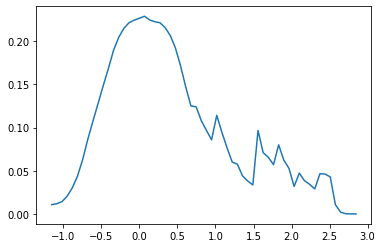

In [59]:
plt.plot(test_md[['pos_idx1','pred_any']].groupby('pos_idx1').mean())

In [89]:
predictions = np.exp(np.log(preds).mean((0,1)))

In [43]:
predictions = 1 / (1 + np.exp(-(np.log(preds/(1-preds)).mean((0,1)))))

In [7]:
predictions = preds.mean((0,1))

In [60]:
predictions.mean(0)

array([0.13211, 0.00537, 0.04281, 0.03049, 0.04686, 0.05557])

In [57]:
predictions.mean(0)

array([0.1280228 , 0.00678272, 0.04317398, 0.03195811, 0.04593468,
       0.05528003], dtype=float32)

In [61]:
id_column = np.array([a + '_' + b for a in test_md.SOPInstanceUID for b in all_ich])
sub = pd.DataFrame({'ID': id_column, 'Label': predictions.reshape(-1)})

In [62]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13210989216026986

In [58]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.1281835436820984

In [63]:
best_sub = pd.read_csv(PATH/'submission_061.csv')

In [12]:
best_sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13475628267250275

In [64]:
sub.to_csv(PATH/'sub.csv', index=False)

In [ ]:
vals = best_sub.Label.values.reshape((-1,6))

for i in range(1,6):
    print(i, 'inconsistencies:', (vals[:,0] < vals[:,i]).sum())
print('total', (vals[:,0] < vals[:,1:].max(1)).sum())

max_vals = vals[:,1:].max(1)

mask = vals[:,0] < max_vals

mask_vals = 0.5*(vals[:,0] + max_vals)[mask]

vals[mask,0] = mask_vals

vals[mask,1:] = np.clip(vals[mask,1:],0,np.expand_dims(mask_vals,1))

assert (vals[:,0] < vals[:,1:].max(1)).sum() == 0

best_sub.Label = vals.reshape(-1)

In [65]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9936759406170499

In [63]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9944464662920349

In [67]:
!~/.local/bin/kaggle competitions submit rsna-intracranial-hemorrhage-detection -f ~/sub.csv -m "GCP, d161+d169+d201+s101, 8TTA, 3folds, ensemble, - sanity check"

100%|██████████████████████████████████████| 20.8M/20.8M [00:05<00:00, 4.35MB/s]
Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [87]:
!kaggle competitions submit rsna-intracranial-hemorrhage-detection -f C:/StudioProjects/Hemorrhage/sub.csv -m "TPU, d161+d169+d201+s101, 32TTA, 3folds, mean/ensemble/mean "

Traceback (most recent call last):
  File "/anaconda3/envs/torch-xla-nightly/bin/kaggle", line 10, in <module>
    sys.exit(main())
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 545, in competition_submit_cli
    competition, quiet)
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 496, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: 'C:/StudioProjects/Hemorrhage/sub.csv'
